In [5]:
!git clone https://github.com/jwalasree/Tree-species-Identification.git

Cloning into 'Tree-species-Identification'...
remote: Enumerating objects: 1632, done.
remote: Total 1632 (delta 0), reused 0 (delta 0), pack-reused 1632 (from 2)
Receiving objects: 100% (1632/1632), 72.82 MiB | 37.43 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [7]:
import os

repo_path = "/content/Tree-species-Identification"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))


Contents: ['5M_trees', 'streamlit_integrated.py', 'README.md', 'tree_CNN.ipynb', '.git', 'Tree_Species_Dataset', '5M_trees.ipynb']


In [8]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 7


In [9]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 106


In [11]:
import os
import pandas as pd

# Replace with your actual image dataset path
repo_path = r"/content/Tree-species-Identification"

# Get class folders
class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d))]

# Count files in each folder
class_counts = {
    cls: len([
        f for f in os.listdir(os.path.join(repo_path, cls))
        if os.path.isfile(os.path.join(repo_path, cls, f))
    ])
    for cls in class_dirs
}

# Build DataFrame
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

# Output
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("Shape:", class_counts_df.shape)


                      Image Count
5M_trees                       65
.git                            5
Tree_Species_Dataset            0
Shape: (3, 1)


In [12]:

import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


                      Image Count
5M_trees                       65
Tree_Species_Dataset           30
.git                           11
shape:  (3, 1)


In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        folder_path = os.path.join(repo_path, class_dir)

        # Filter only image files
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not files:
            print(f"No image files found in {folder_path}")
            continue

        img_path = os.path.join(folder_path, files[0])
        img = Image.open(img_path)

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')

    plt.show()


In [17]:
import os
from PIL import Image
import pandas as pd

image_shapes = []

# Loop through each class directory
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    # Filter only image files (by extension)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except Exception as e:
            print(f"Skipping file {img_path} due to error: {e}")

# Create DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height


In [18]:
print(shapes_df.describe())


       Width Height
count      0      0
unique     0      0
top      NaN    NaN
freq     NaN    NaN


In [22]:
import os
import hashlib
from collections import defaultdict

hashes = defaultdict(list)

# Allowed image extensions
valid_exts = ('.png', '.jpg', '.jpeg')

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_exts):
            continue  # Skip non-image files

        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

print("Duplicate image sets found:", len(duplicates))

# Optional: Print first few duplicate sets
for i, (h, files) in enumerate(duplicates.items()):
    print(f"\nDuplicate set {i+1}:")
    for f in files:
        print(f)
    if i >= 2:  # Show only first 3 sets
        break


Duplicate image sets found: 0


In [23]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 106


In [24]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [25]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 0 duplicate images.


In [27]:
import os
import hashlib
from collections import defaultdict

hashes = defaultdict(list)
valid_exts = ('.jpg', '.jpeg', '.png')  # Add more if needed

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)

    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_exts):
            continue  # Skip non-image files

        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

# Filter only hashes with more than 1 image (duplicates)
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [30]:
import os
from PIL import Image
import pandas as pd

image_info = []
valid_exts = ('.png', '.jpg', '.jpeg')  # Filter image files

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_exts):
            continue  # Skip non-images

        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except Exception as e:
            print(f"⚠️ Skipping {img_path} due to error: {e}")
            continue

# Now convert to DataFrame
df_sizes = pd.DataFrame(image_info)

# ✅ Confirm columns exist
print("Columns:", df_sizes.columns)

# Define thresholds
if not df_sizes.empty and 'width' in df_sizes.columns:
    small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
    large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

    print(f"🔻 Very small images: {len(small_imgs)}")
    print(f"🔺 Very large images: {len(large_imgs)}")
else:
    print("❌ No valid image data found.")


Columns: RangeIndex(start=0, stop=0, step=1)
❌ No valid image data found.


In [32]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Setup
valid_exts = ('.png', '.jpg', '.jpeg')
image_info = []

# Step 1: Collect image info
for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_exts):
            continue  # Skip non-images

        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except Exception as e:
            print(f"⚠️ Skipping {img_path} due to error: {e}")
            continue

# Step 2: Create DataFrame
df_sizes = pd.DataFrame(image_info)

# Step 3: Filter small & large images
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)] if not df_sizes.empty else pd.DataFrame()
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)] if not df_sizes.empty else pd.DataFrame()

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

# Step 4: Define function to show image samples
def show_images(df_subset, title, n=5):
    if df_subset.empty:
        print(f"⚠️ No images to show for: {title}")
        return

    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        try:
            img = Image.open(row['path'])
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(f"{row['width']}x{row['height']}")
            plt.axis('off')
        except Exception as e:
            print(f"❌ Couldn't open image {row['path']}: {e}")
            continue
    plt.suptitle(title)
    plt.show()

# Step 5: Show small & large images
show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


🔻 Very small images: 0
🔺 Very large images: 0
⚠️ No images to show for: Very Small Images
⚠️ No images to show for: Very Large Images


In [34]:
import os
import pandas as pd

# Combine small and large outliers
outliers = pd.concat([small_imgs, large_imgs])

# Debug: Check columns
print("✅ Columns in outliers DataFrame:", outliers.columns.tolist())

# Remove only if 'path' column exists
if 'path' in outliers.columns:
    removed_count = 0

    for path in outliers['path']:
        try:
            os.remove(path)
            removed_count += 1
        except Exception as e:
            print(f"❌ Failed to remove {path}: {e}")

    print(f"🗑️ Successfully removed {removed_count} outlier images.")
else:
    print("⚠️ Column 'path' not found in outliers DataFrame. No files were removed.")


✅ Columns in outliers DataFrame: []
⚠️ Column 'path' not found in outliers DataFrame. No files were removed.


In [36]:
import os
from PIL import Image
import pandas as pd

# Recalculate sizes with filtering
image_info = []
valid_exts = ('.png', '.jpg', '.jpeg')

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        if not img_file.lower().endswith(valid_exts):
            continue  # Skip non-images

        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except Exception as e:
            print(f"⚠️ Skipping {img_path}: {e}")
            continue

# Create DataFrame
df_sizes = pd.DataFrame(image_info)

# Debug print
print("📊 Columns in DataFrame:", df_sizes.columns.tolist())
print("🧾 First few rows:")
print(df_sizes.head())

# Only show stats if width & height are present
if {'width', 'height'}.issubset(df_sizes.columns):
    print(df_sizes[['width', 'height']].describe())
else:
    print("❌ 'width' and 'height' columns not found in df_sizes.")


📊 Columns in DataFrame: []
🧾 First few rows:
Empty DataFrame
Columns: []
Index: []
❌ 'width' and 'height' columns not found in df_sizes.


In [1]:
!pip install tensorflow==2.18.0 numpy==1.26.4

In [ ]:
import os
os.kill(os.getpid(), 9)  # This restarts the Colab runtime

In [4]:
!ls Tree-species-Identification

5M_trees	README.md		 tree_CNN.ipynb
5M_trees.ipynb	streamlit_integrated.py  Tree_Species_Dataset


In [8]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Updated path
repo_path = "Tree-species-Identification/Tree_Species_Dataset"

# Check path
if not os.path.exists(repo_path):
    raise FileNotFoundError(f"❌ Dataset not found at: {repo_path}")

# Parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

# Training and validation generators
train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.


In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [10]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.0822 - loss: 3.4512 - val_accuracy: 0.0938 - val_loss: 3.3825
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.0827 - loss: 3.3990 - val_accuracy: 0.0938 - val_loss: 3.3793
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.0843 - loss: 3.4041 - val_accuracy: 0.0938 - val_loss: 3.3738
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.0937 - loss: 3.3871 - val_accuracy: 0.0938 - val_loss: 3.3683
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.0943 - loss: 3.3819 - val_accuracy: 0.0938 - val_loss: 3.3786
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.0839 - loss: 3.3876 - val_accuracy: 0.0938 - val_loss: 3.3670
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.0951 - loss: 3.3744 - val_accuracy: 0.0938 - val_loss: 3.3694
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.0836 - loss: 3.3855 - val_accuracy: 0.0938 - v

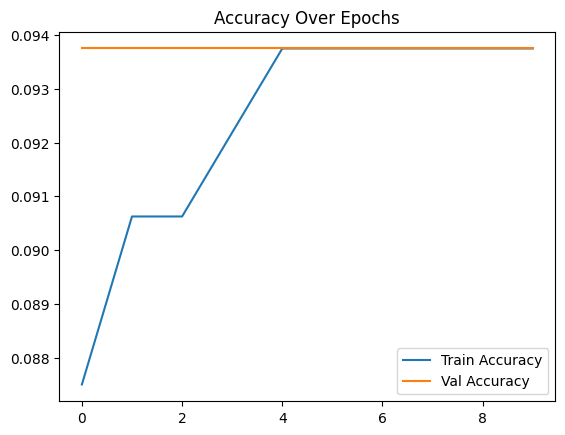

In [11]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - accuracy: 0.0668 - loss: 3.9866 - val_accuracy: 0.1250 - val_loss: 3.1758
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.1128 - loss: 3.2028 - val_accuracy: 0.1344 - val_loss: 3.0486
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.1328 - loss: 3.0500 - val_accuracy: 0.1688 - val_loss: 2.9709
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.1711 - loss: 2.9360 - val_accuracy: 0.1906 - val_loss: 2.8737
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 183s 5s/step - accuracy: 0.1991 - loss: 2.8129 - val_accuracy: 0.2062 - val_loss: 2.8016
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.2094 - loss: 2.7808 - val_accuracy: 0.2438 - val_loss: 2.6392
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.2244 - loss: 2.6921 - val_accuracy: 0.2438 - val_loss: 2.6913
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.2467 - loss: 2.5949 - val_accuracy: 0.2844 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


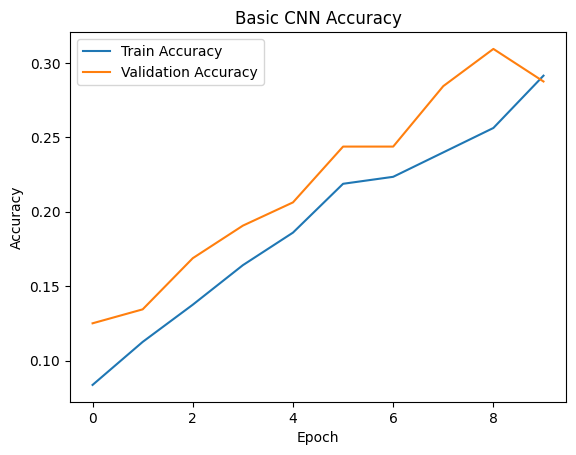

In [13]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 276s 7s/step - accuracy: 0.0728 - loss: 5.1654 - val_accuracy: 0.0312 - val_loss: 9.2902
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 266s 7s/step - accuracy: 0.1245 - loss: 3.2323 - val_accuracy: 0.0312 - val_loss: 17.1774
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 265s 7s/step - accuracy: 0.1363 - loss: 3.0956 - val_accuracy: 0.0312 - val_loss: 20.2766
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step - accuracy: 0.1597 - loss: 3.0362 - val_accuracy: 0.0312 - val_loss: 20.7513
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 263s 7s/step - accuracy: 0.1666 - loss: 2.9893 - val_accuracy: 0.0375 - val_loss: 16.4107
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 322s 7s/step - accuracy: 0.1844 - loss: 2.9497 - val_accuracy: 0.0312 - val_loss: 18.4721
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.1698 - loss: 2.9532 - val_accuracy: 0.0344 - val_loss: 19.2108
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.1967 - loss: 2.8653 - val_accuracy: 0.05